In [1]:
import pandas as pd
import numpy as np
from time import time
import sys
import sklearn
import matplotlib.pyplot as plt
print(pd.__version__)
print(np.__version__)
print(sys.version)
print(sklearn.__version__)

0.23.4
1.15.4
3.7.3 | packaged by conda-forge | (default, Jul  1 2019, 21:52:21) 
[GCC 7.3.0]
0.21.3


# Load the Dataset

In [3]:
kdd_data_10percent = pd.read_csv("kddcup99_csv.csv")
kdd_data_10percent.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [5]:
kdd_data_10percent.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494020.000000,4.940200e+05,4.940200e+05,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,...,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000
mean,47.979400,3.025616e+03,8.685308e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148245,0.010212,...,232.471248,188.666052,0.753781,0.030906,0.601936,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.747185,9.882191e+05,3.304003e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355343,1.798328,...,64.744601,106.040205,0.410780,0.109259,0.481309,0.042133,0.380593,0.380920,0.230590,0.230141
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
print('Label distribution Training set:')
print(kdd_data_10percent["label"].value_counts())

Label distribution Training set:
smurf              280790
neptune            107201
normal              97277
back                 2203
satan                1589
ipsweep              1247
portsweep            1040
warezclient          1020
teardrop              979
pod                   264
nmap                  231
guess_passwd           53
buffer_overflow        30
land                   21
warezmaster            20
imap                   12
rootkit                10
loadmodule              9
ftp_write               8
multihop                7
phf                     4
perl                    3
spy                     2
Name: label, dtype: int64


In [7]:
from sklearn.neighbors import KNeighborsClassifier
labels = kdd_data_10percent['label'].copy()
labels[labels!='normal.'] = 'attack.'
labels.value_counts()

attack.    494020
Name: label, dtype: int64

#  Log-scaled distribution of attacks

<Figure size 432x288 with 0 Axes>

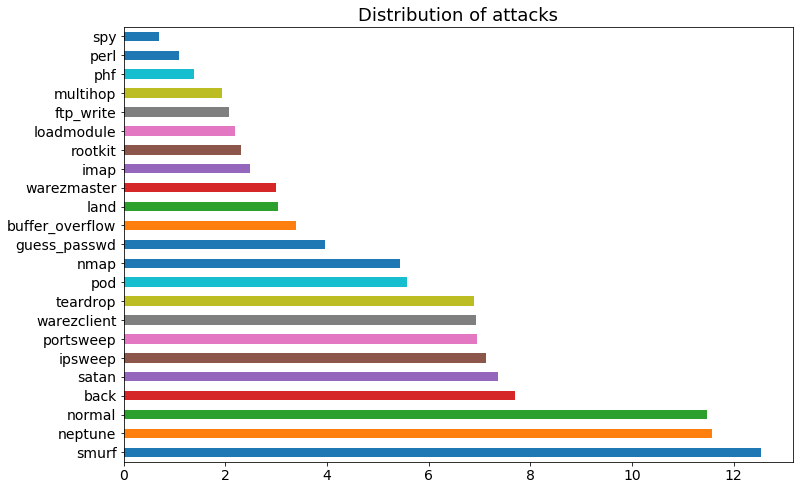

In [9]:
plt.clf()
plt.figure(figsize=(12,8))
params = {'axes.titlesize':'18',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14'}
plt.rcParams.update(params)
plt.title('Distribution of attacks')
#df.plot(kind='barh')
kdd_data_10percent['label'].value_counts().apply(np.log).plot(kind='barh')
plt.show()

# Analysis of discrete differences in relation to attacks 
and network services We will analyze the relationship or 
service of the network used to allocate two pairs of identified attacks.
To do this, we will draw a bar graph that shows the percentage of participation of each network service in
each attack.  To facilitate viewing, we will only consider attacks that represent at least 1% 
of the total percentage of attacks or types of network services.









Through the graph you can see some important characteristics of two dice, such as the main types of current attack and protocol used.  We see that clearly a greater part of the network of networks present a set of data is not characterized as "normal", or seja, a network flow is a type of malicious activity detected.  In addition, the main attacks that are present are given by SYN Flood (Neptune), guess_passord, mailbomb and Smurf. 

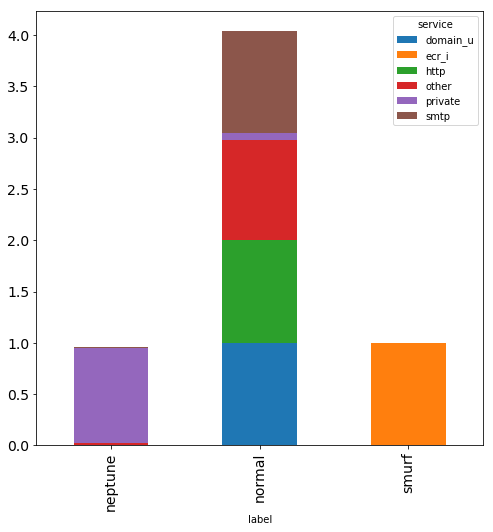

In [10]:
## Create a subset of main dataset (f_data) that contains only services and labels that represents at
## least 1% of the total cases

f_services = pd.crosstab(index=kdd_data_10percent["service"],columns="count")
f_services = f_services/len(kdd_data_10percent)
f_services = f_services[f_services["count"] > 0.01]

f_attacks = pd.crosstab(index=kdd_data_10percent["label"],columns="count")
f_attacks = f_attacks/len(kdd_data_10percent)
f_attacks = f_attacks[f_attacks["count"] > 0.01]

f_data = kdd_data_10percent[kdd_data_10percent['service'].isin(list(f_services.index))]
f_data = f_data[f_data['label'].isin(list(f_attacks.index))]

## Create the plot

attack_data = pd.crosstab(index = f_data["label"], columns=f_data["service"])
frequency_table_attack = (attack_data/attack_data.sum())

frequency_table_attack.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True);

# 6  Relationship between Attacks and Protocol

Types Using the previous mesma approach, we will evaluate or participate the percentage of each network protocol in each type of attack. Or, analyze and visualize objectively there is some feature that can be found in the literature

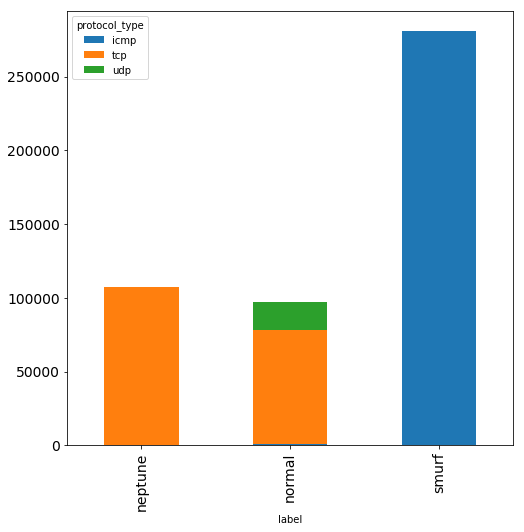

In [11]:
## Create a subset of main dataset (f_data) that contains only protocols and labels that represents at
## least 1% of the total cases

f_protocol = pd.crosstab(index=kdd_data_10percent["protocol_type"],columns="count")
f_protocol = f_protocol/len(kdd_data_10percent)
f_protocol = f_protocol[f_protocol["count"] > 0.01]

f_data = kdd_data_10percent[kdd_data_10percent['protocol_type'].isin(list(f_protocol.index))]
f_data = f_data[f_data['label'].isin(list(f_attacks.index))]

## Create a Two-Way Table

relationship_protocoal_attack = pd.crosstab(index=f_data["label"], 
                          columns=f_data["protocol_type"])
## Plot the Two-Way Table
relationship_protocoal_attack.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True);

 it was expected to provide literature data, attacks of type SYN Flood (Neptune) ocorreram in networks with TCP protocol and Smurf attacks in ICMP networks. We can also note that attacks of type SNMP foram feitos exclusively in networks that utizam UDP.


# Percentage of participation of each type of network protocol or Abaixo

graphic visa to give an overview of the participation of each type of protocol in the network that the data foram collected

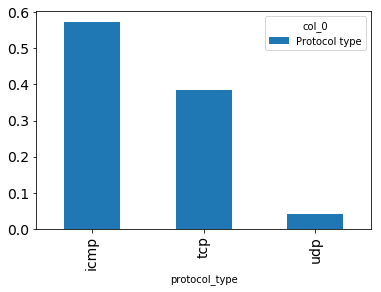

In [12]:
## Create a cross tab dataframe
protocol_data = pd.crosstab(index = kdd_data_10percent["protocol_type"],columns="Protocol type")
frequency_table_protocol = (protocol_data/protocol_data.sum())
## Plot the dataframe
frequency_table_protocol.plot.bar();


# Analyze two users logged not system

We deem it interesting to evaluate the behavior pattern of users who are somehow logged into the network. In this way, we will create graphs that analyze if any threats were detected for the following types of users:

users registered as guests; Users of the list of ¨hot¨

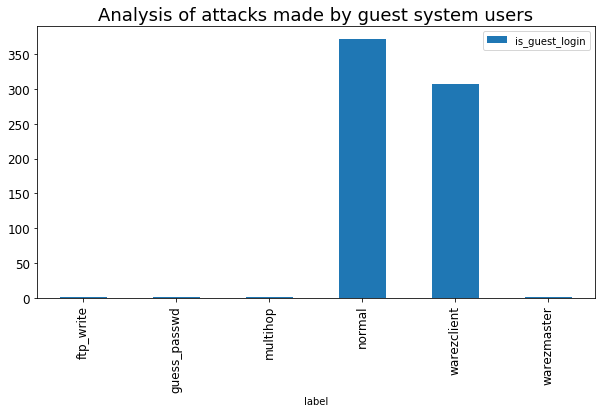

In [13]:
df_temp = kdd_data_10percent[["is_guest_login","label"]]
df_temp = df_temp.loc[df_temp['is_guest_login'] == 1]
df_temp.groupby(["label"]).count().plot(kind='bar', title ="Analysis of attacks made by guest system users", figsize=(10, 5), legend=True, fontsize=12)

# We note that all attacks identified in this category of users are of type R2L (remote to local).

Attacks of this type occur when an attacker has the ability to send packets to a machine through the network, but does not have an account on that machine and exploits some vulnerability to gain local access as a machine user. That is, probably those identified "guest users" probably had their login hacked by the attacker.

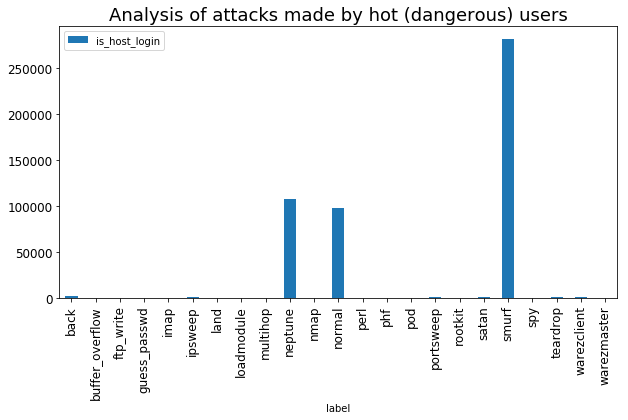

In [14]:
df_temp = kdd_data_10percent[["is_host_login","label"]]
df_temp = df_temp.loc[df_temp["is_host_login"] == 0]
df_temp.groupby(["label"]).count().plot(kind='bar', title ="Analysis of attacks made by hot (dangerous) users", figsize=(10, 5), legend=True, fontsize=12)

In this case we also have U2R (User to Root attack) attacks. In this case the attacker accesses the system as a normal user (gained by: sniffing password, a local dictionary or social engineering) and starts exploiting vulnerabilities to gain root access to the system.

# Redundant Data Analysis

According to Tavallaee (2009), the large number of redundant records can bias the classifiers to the most frequent records. In this way, the author proposes a new dataset, removing the duplicates. Thus, we will analyze the complete KDD99 dataset and the no duplicates. For this we will analyze the ratio between single and duplicate data and plot the relationship graph between attacks and services, and between attacks and protocols used.

In [15]:
# Removing dupicates
df_no_duplicates = kdd_data_10percent.drop_duplicates()
percentage = 1 - float(df_no_duplicates["protocol_type"].count())/float(kdd_data_10percent["protocol_type"].count())
print("\n O dataset sem duplicatas é {}% menor que o dataset original,".format(round(percentage * 100,2)))


 O dataset sem duplicatas é 70.53% menor que o dataset original,
